<a href="https://colab.research.google.com/github/hanucherukuri/Applied-data-science-capstone-project/blob/master/yelp_VADER_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
#Importing nltk and vader lexicons
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#loading dataset
!pip install datasets
from datasets import load_dataset


     |████████████████████████████████| 264 kB 4.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 118 kB 49.8 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 243 kB 45.2 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
# splitting data
train_dataset = load_dataset('yelp_polarity', split = "train")
test_dataset = load_dataset('yelp_polarity', split = "test")

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/166M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset yelp_polarity downloaded and prepared to /root/.cache/huggingface/datasets/yelp_polarity/plain_text/1.0.0/a770787b2526bdcbfc29ac2d9beb8e820fbc15a03afd3ebc4fb9d8529de57544. Subsequent calls will reuse this data.


Reusing dataset yelp_polarity (/root/.cache/huggingface/datasets/yelp_polarity/plain_text/1.0.0/a770787b2526bdcbfc29ac2d9beb8e820fbc15a03afd3ebc4fb9d8529de57544)


In [ ]:
# displaying features and labels
print("train_dataset:", display(train_dataset))
print("test_dataset:", display(test_dataset))

Dataset({
    features: ['text', 'label'],
    num_rows: 560000
})

train_dataset: None


Dataset({
    features: ['text', 'label'],
    num_rows: 38000
})

test_dataset: None


In [ ]:
# converting to dataframe
train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)

In [ ]:
# 0: Negative
# 1: Positive
# train set first 10 rows
train_df.head(10)

,text,label
0,"Unfortunately, the frustration of being Dr. Go...",0
1,Been going to Dr. Goldberg for over 10 years. ...,1
2,I don't know what Dr. Goldberg was like before...,0
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,1
5,Wing sauce is like water. Pretty much a lot of...,0
6,Owning a driving range inside the city limits ...,0
7,This place is absolute garbage... Half of the...,0
8,Before I finally made it over to this range I ...,1
9,I drove by yesterday to get a sneak peak. It ...,1


In [ ]:
# calling sentiment intensity analyzer object
sia = SentimentIntensityAnalyzer()
sia

In [ ]:
# finding polarity for test set
test_df['polarity_scores'] = test_df['text'].apply(lambda text: sia.polarity_scores(text))

In [ ]:
# computing compound score
test_df['compound']  = test_df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
test_df['class'] = test_df['compound'].apply(lambda c: 1 if c >=0 else 0)

In [ ]:
# first 10 rows
test_df.head(10)

,text,label,polarity_scores,compound,class
0,"Contrary to other reviews, I have zero complai...",1,"{'neg': 0.083, 'neu': 0.826, 'pos': 0.09, 'com...",-0.0258,0
1,Last summer I had an appointment to get new ti...,0,"{'neg': 0.145, 'neu': 0.761, 'pos': 0.094, 'co...",-0.4339,0
2,"Friendly staff, same starbucks fair you get an...",1,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",0.6705,1
3,The food is good. Unfortunately the service is...,0,"{'neg': 0.179, 'neu': 0.725, 'pos': 0.096, 'co...",-0.5046,0
4,Even when we didn't have a car Filene's Baseme...,1,"{'neg': 0.017, 'neu': 0.812, 'pos': 0.171, 'co...",0.9633,1
5,"Picture Billy Joel's \""""Piano Man\"""" DOUBLED m...",1,"{'neg': 0.03, 'neu': 0.728, 'pos': 0.242, 'com...",0.9917,1
6,Mediocre service. COLD food! Our food waited s...,0,"{'neg': 0.135, 'neu': 0.801, 'pos': 0.064, 'co...",-0.3802,0
7,Ok! Let me tell you about my bad experience fi...,0,"{'neg': 0.073, 'neu': 0.795, 'pos': 0.132, 'co...",0.9621,1
8,I used to love D&B when it first opened in the...,0,"{'neg': 0.096, 'neu': 0.771, 'pos': 0.133, 'co...",0.8145,1
9,"Like any Barnes & Noble, it has a nice comfy c...",1,"{'neg': 0.019, 'neu': 0.676, 'pos': 0.305, 'co...",0.9646,1


In [ ]:
#  dipslaying text
test_df["text"][1]

'Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \\""fixed\\"" it for free, and the very next morning I had the same issue. I called to complain, and the \\""manager\\"" didn\'t even apologize!!! So frustrated. Never going back.  They seem overpriced, too.'

In [ ]:
# displaying polarity scores
test_df["polarity_scores"][1]

{'compound': -0.4339, 'neg': 0.145, 'neu': 0.761, 'pos': 0.094}

In [ ]:
# finding values in each class
test_df["class"].value_counts()

1    29182
0     8818
Name: class, dtype: int64

In [ ]:
# classification report
target_names = ['class 0', 'class 1']
cls_rep = classification_report(test_df["label"], test_df["class"], target_names = target_names)

In [ ]:
# printing classification report
print(cls_rep)

              precision    recall  f1-score   support

     class 0       0.95      0.44      0.60     19000
     class 1       0.63      0.98      0.77     19000

    accuracy                           0.71     38000
   macro avg       0.79      0.71      0.68     38000
weighted avg       0.79      0.71      0.68     38000



In [ ]:
# confusion matrix
cm= confusion_matrix(test_df["label"], test_df["class"])
cm

array([[ 8346, 10654],
       [  472, 18528]])

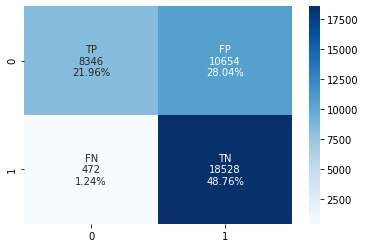

In [ ]:
# Plotting confusion matrix
group_names = ["TP","FP","FN","TN"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
Print ("end of the note book"